# Insper - Ciência dos Dados 2022.2

## Engenharia - 2ºB

### Integrantes do grupo:

* Beatriz Rodrigues de Freitas

* Carlos Eduardo Porciuncula Yamada

* Verônica Luisa Ribeiro Lima

___
<div id='sumario'></div>

## Sumário

1. [Introdução](#intro)

2. [Minerando Dados e Características do Dataset](#data-mining)

3. [Modelos de Predição](#prediction)

4. [Processo e Estatísticas de Validação](#validation)

5. [Conclusão](#conclusion)

6. [Referências Bibliográficas](#ref)

___
<div id='intro'></div>

## 1. Introdução

### Objetivos

Ao longo do notebook, pretende-se:

* Mostrar **como pode-se prever a faixa de preço de um celular** dadas suas características (potência da bateria, memória ram, tamanho da tela etc).

* Fazer a análise exploratória da base de dados, observando a distribuição das variáveis em relação a variável depentende, que nesse caso é o price range.

* Identificar os métodos de previsão adequados para a base de dados e entender como aplicá-los para responder como prever a faixa de preço de um celular.

* Comparar os métodos utilizados, comparando os resultados das previsões feitas pela máquina com os valores reais fornecidos pela base de dados, a fim de identificar falhas nos modelos e métodos a serem utilizados para melhorar a acurácia da previsão.

### Descrição da base de dados

A base de dados utilizada em nosso projeto possui nos dá informações técnicas sobre telefones celulares, como memória RAM, carga máxima de bateria, entre outros. Utilizaremos essas informações para definir o range de preço para cada celular que nos será fornecido.

Temos que:

* `battery_power`: capacidade total da bateria, em mAh
* `blue`: booleano, possui bluetooth **($1$)** ou não **($0$)**
* `clock_speed`: velocidade na qual o microprocessador executa instruções (execuções por segundo)
* `dual_sim`: booleano, possui suporte para *Dual SIM* **($1$)** ou não **($0$)**
* `fc`: resolução da câmera frontal, em *megapixels*
* `four_g`: booleano, possui 4G **($1$)** ou não **($0$)**
* `int_memory`: memória interna, em *gigabytes*
* `m_dep`: profundidade do celular, em centímetros
* `mobile_wt`:peso do telefone, em gramas
* `n_cores`: número de núcleos **(*cores*)** do processador
* `pc`: resolução da câmera principal, em *megapixels*
* `px_height`: resolução (altura) da tela, em px
* `px_width`: resolução (comprimento) da tela, em px
* `ram`: memória RAM, em *megabytes*
* `sc_h`: altura da tela, em centímetros
* `sc_w`: comprimento da tela, em centímetros
* `talk_time`: tempo máximo que a bateria dura quando carregada completamente, em horas
* `three_g`: booleano, possui 3G **($1$)** ou não **($0$)**
* `touch_screen`: booleano, possui *touchscreen* **($1$)** ou não **($0$)**
* `wifi`: booleano, possui *Wi-fi* **($1$)** ou não **($0$)**
* `price_range`: *range* do preço do telefone, variando entre $0$ (aparelhos mais baratos) e $3$ (aparelhos mais caros) 


As bibliotecas utilizadas na contrução do robô serão as seguintes:

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

from yellowbrick.classifier import ConfusionMatrix


In [43]:
celular = pd.read_csv('dados/celular_train.csv', sep=',',  encoding='latin-1')
celular.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


___
<div id='data-mining'></div>

## 2. Minerando Dados e Características do Dataset




Primeiro, foi retirado o ID do dispositivo, pois não é uma variável de componentes dos celulares, logo, não serve para classificar os preços por tal.

In [44]:
dados = celular.loc[:, ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi', 'price_range']]

dados.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,1,0,2


In [45]:
dados.shape

(2000, 20)

Como todos as features são numéricas, não é necessário reclassificá-las ou fazer maiores alterações além de eliminar valores nulos (nan), como feito a seguir:

In [46]:
dados.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

[Voltar para o sumário](#sumario)


## 2.1 Análise exploratória


### 2.1 Disposição dos preços

O primeiro passo é entender como funciona a distribuição da variável Target na base de dados. Para isso, utiliza-se do Describe() e de algumas análise gráfica:

In [47]:
dados['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

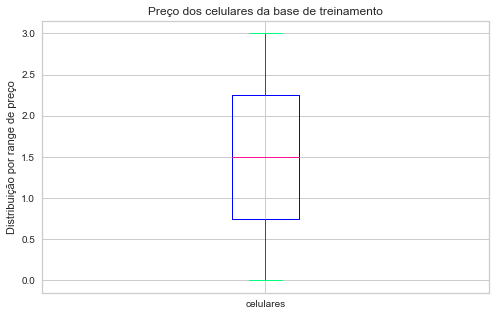

In [48]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.boxplot(dados['price_range'], labels = ['celulares'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Preço dos celulares da base de treinamento')
plt.ylabel('Distribuição por range de preço')

plt.show()

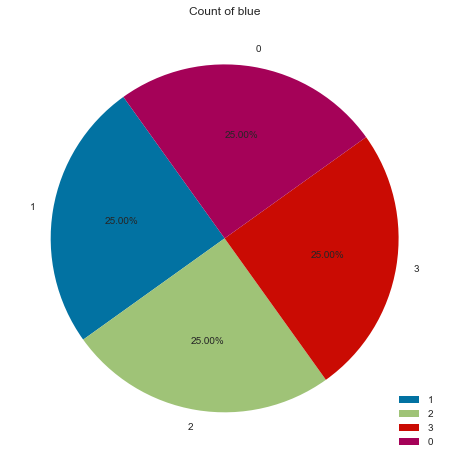

In [49]:
plt.figure(figsize=(10,8))

range_preco = dados['price_range'].value_counts().values/10
nome = dados['price_range'].value_counts().index
plt.title('Count of blue') 
plt.pie( range_preco,startangle=125.6,autopct='%1.2f%%', labels=nome)
plt.legend(labels=nome,loc='lower right')
plt.show()

A partir das distribuições apresentadas, espera-se que os preços se ordenem de maneira uniforme.

### 2.2 Comparação das variáveis

Para a análise das features, o principal ponto desejado é como cada uma delas interfere na Target. 
Assim, utilizaremos análise gráfica para cada uma delas, começando pela distribuição das booleanas:

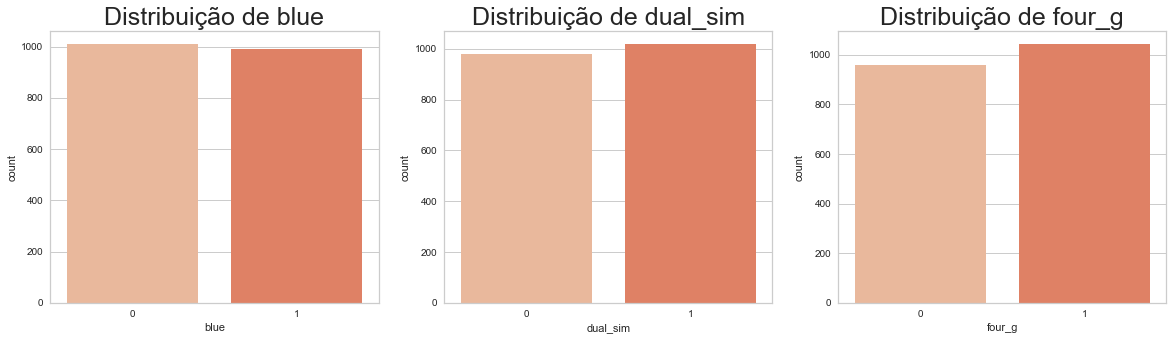

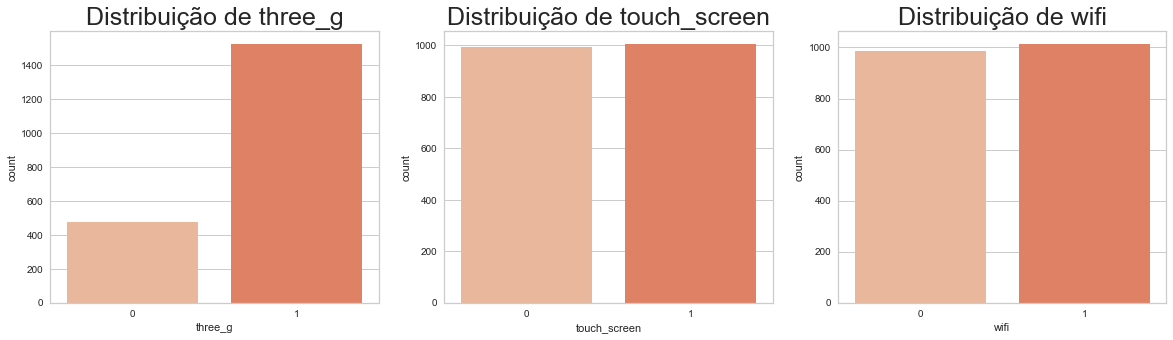

In [50]:
bool = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
i=0
while i<6:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    palette = sns.color_palette("rocket_r")
    sns.countplot(x=bool[i], data=dados,  palette=palette)
    plt.title(('Distribuição de {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,2)
    sns.countplot(x=bool[i], data=dados,  palette=palette)
    plt.title(('Distribuição de {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=bool[i], data=dados,  palette=palette)
    plt.title(('Distribuição de {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.show()

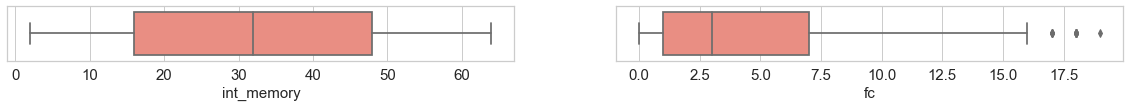

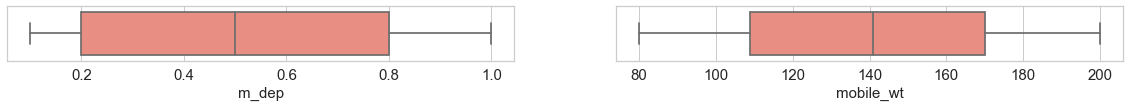

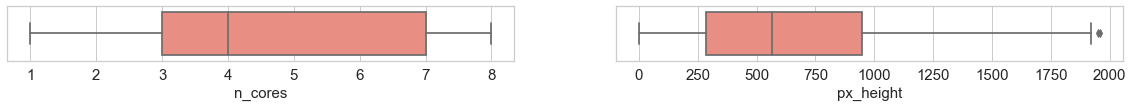

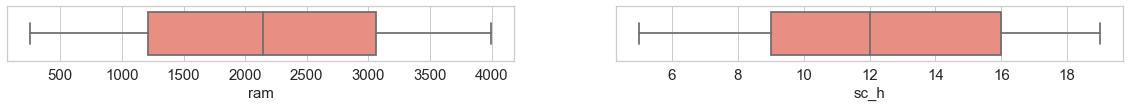

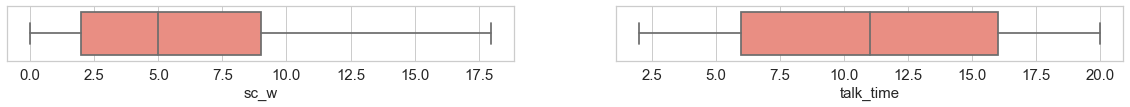

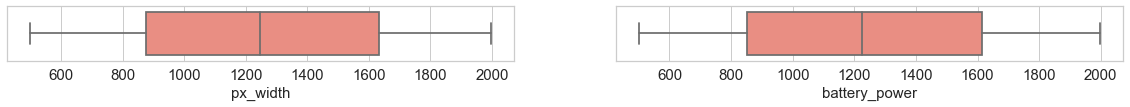

In [51]:
# Conferindo distribuição para as features contínuas

n_b = ['int_memory','fc','m_dep','mobile_wt', 'n_cores','px_height','ram','sc_h','sc_w','talk_time', 'px_width', 'battery_power']
         
i = 0
while i<12:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   
    sns.boxplot(x = n_b[i], data=dados, color='salmon') 
    plt.xticks(fontsize=15)
    plt.xlabel(n_b[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = n_b[i], data=dados, color='salmon') 
    plt.xticks(fontsize=15)
    plt.xlabel(n_b[i],fontsize=15)
    i += 1
    plt.show()

Com a distribuição de cada feature, notamos que nem todas poderão ter seu peso na target analisado da mesma forma. 
Por exemplo: o px_height tem muitas variações, assim como px_width, então seria inviável ponderar como cada uma delas influencia no preço do celular.
Dessa forma, busca-se algumas variações dentre as comparações gráficas para as features. 

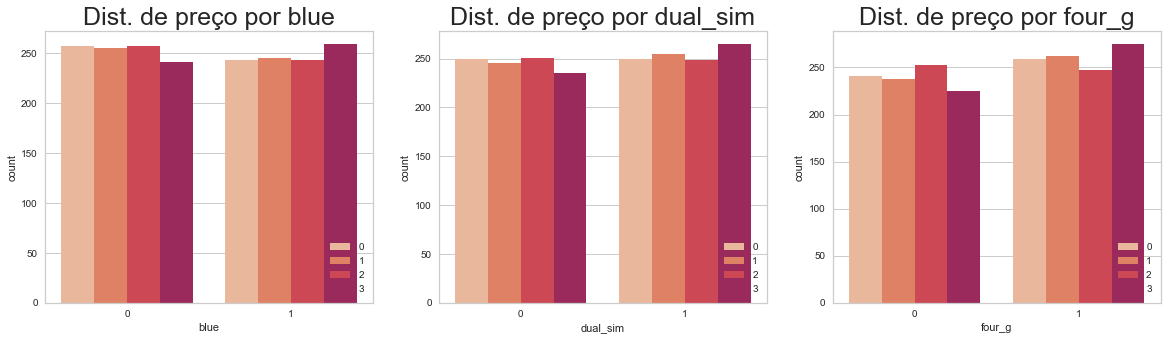

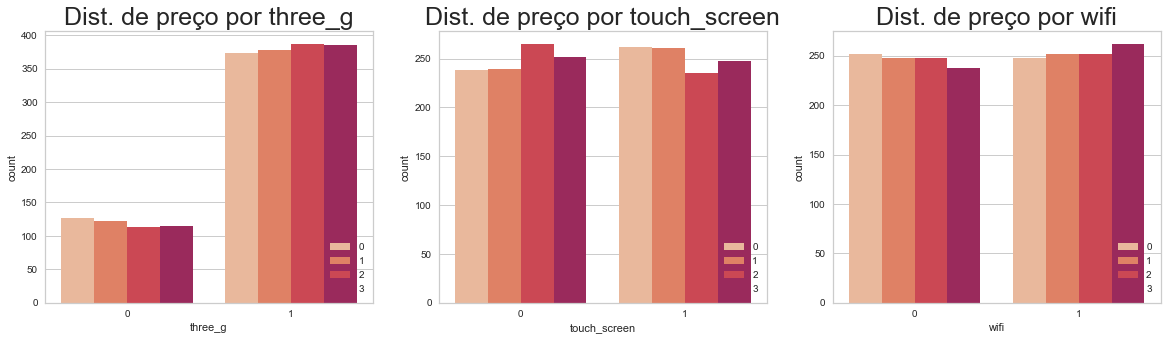

In [52]:
i=0
while i<6:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    palette = sns.color_palette("rocket_r")
    sns.countplot(x=bool[i], data=dados, hue='price_range', palette=palette)
    plt.legend(loc='lower right')
    plt.title(('Dist. de preço por {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,2)
    sns.countplot(x=bool[i], data=dados, hue='price_range', palette=palette)
    plt.legend(loc='lower right')
    plt.title(('Dist. de preço por {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=bool[i], data=dados, hue='price_range', palette=palette)
    plt.legend(loc='lower right')
    plt.title(('Dist. de preço por {}'.format(bool[i])), fontsize=25)
    i+=1
    plt.show()

Nesses gráficos nota-se que os preços são bem distruibuidos entre os celulares que tem ou não determinados componentes. 

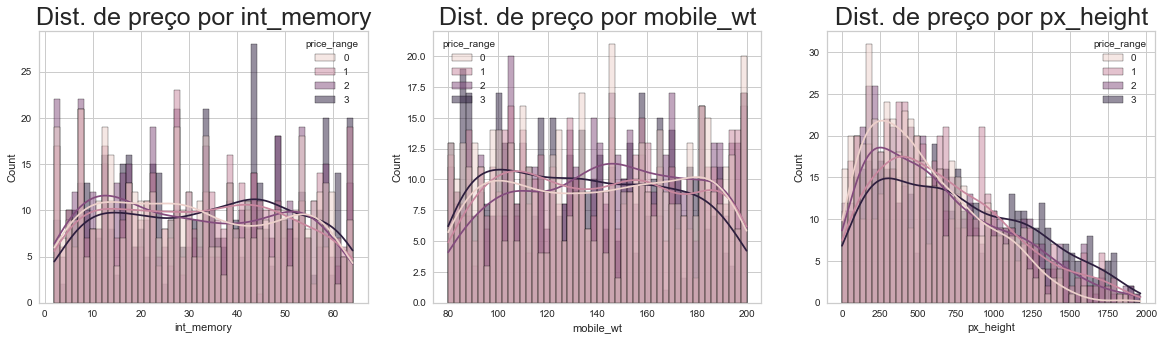

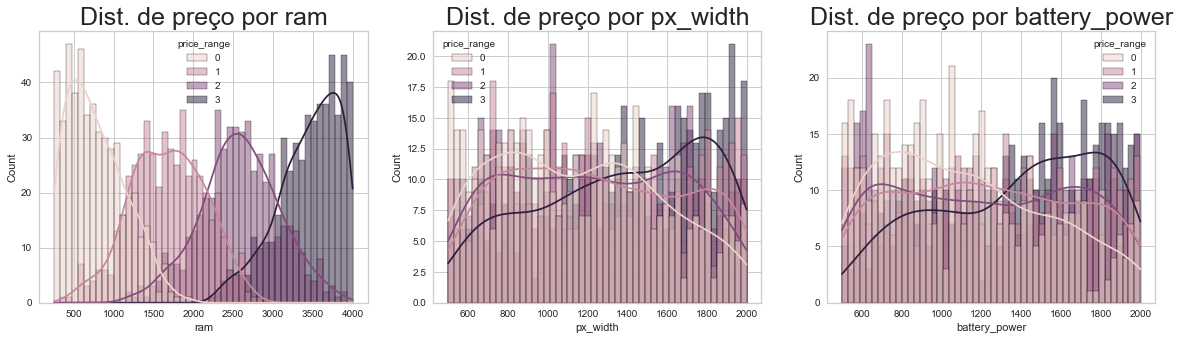

In [53]:
n_b2 = ['int_memory','mobile_wt','px_height','ram', 'px_width', 'battery_power']
  
i = 0
while i<6:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=n_b2[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b2[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,2)
    sns.histplot(x=n_b2[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b2[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,3)
    sns.histplot(x=n_b2[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b2[i])), fontsize=25)
    i+=1
    plt.show()

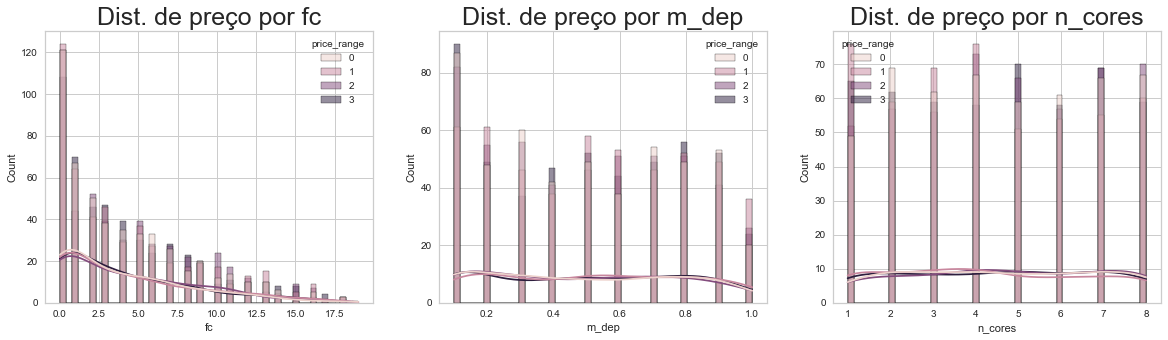

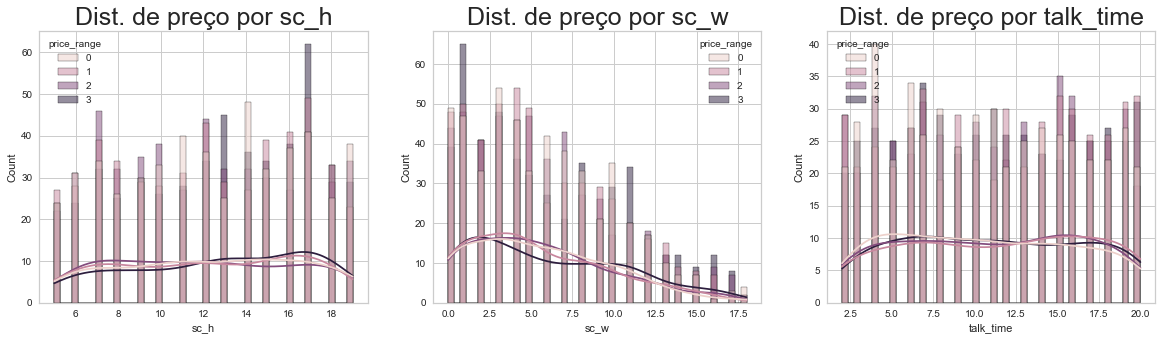

In [72]:
n_b3 = ['fc','m_dep', 'n_cores','sc_h','sc_w','talk_time']

i = 0
while i<6:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=n_b3[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b3[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,2)
    sns.histplot(x=n_b3[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b3[i])), fontsize=25)
    i+=1
    plt.subplot(1,3,3)
    sns.histplot(x=n_b3[i], hue="price_range" ,kde=True, bins=50 ,data=dados)
    plt.title(('Dist. de preço por {}'.format(n_b3[i])), fontsize=25)
    i+=1
    plt.show()


Separando os tipos de gráficos pela quantidade de categorias, permite-se observar como o preço se comporta no decorrer das variáveis. Talves a que mais se destoe seja, de fato, a memória ram, pois nos demais componentes os ranges se encontram misturados, indicando uma dificuldade de dessociar o preço por poucos requisitos, sendo necessário um trabalho com o todo para melhores resultados. 

[Voltar para o sumário](#sumario)

___
<div id='prediction'></div>

## 3. Modelos de Predição

### Criando base de teste e treinamento 

A base da dados deve ser seraparada entre uma parte qual será responsável por ensinar o algoritmo a fazer as predições, e em outra na qual o robô será testato, para verificar sua eficiência. 

In [55]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
x = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .60)

x_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
891,1652,0,0.6,1,4,1,40,1.0,198,7,352,1084,3592,7,6,6,1,0,0
1796,793,1,2.8,1,1,1,64,0.4,179,4,818,1006,2296,12,0,5,1,1,0
1868,1766,1,0.5,1,1,1,22,0.8,122,8,291,1318,3297,7,5,16,1,0,0


In [56]:
x_test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,154,550,2678,16,5,13,1,0,1


### Árvore de Decisão

A criação da árvore de decisão consiste em dividir os dados  utilizando as categorias das variáveis independentes de forma que os novos grupos de dados obtidos sejam cada vez mais uniformes. Essas divisões criam nós de decisão, que estabelecem o critério que será utilizado para um elemento seguir por um caminho ou por outro. Os últimos grupos da divisão serão os mais uniformes possíveis em relação a target, indicando que os caminhos criados já permitem classificar os elementos.


Dessa forma, aplicando o modelo da árvore de decisão gerado na base de testes, cada elemento irá "percorrer" um determinado caminho definido pelos nós de decisão até serem classificados, quando atingem os nós folhas.

https://blog.somostera.com/data-science/arvores-de-decisao

https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

#### Criando a árvore de decisão

In [57]:
arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100)
arvre.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

#### Visualizando a árvore

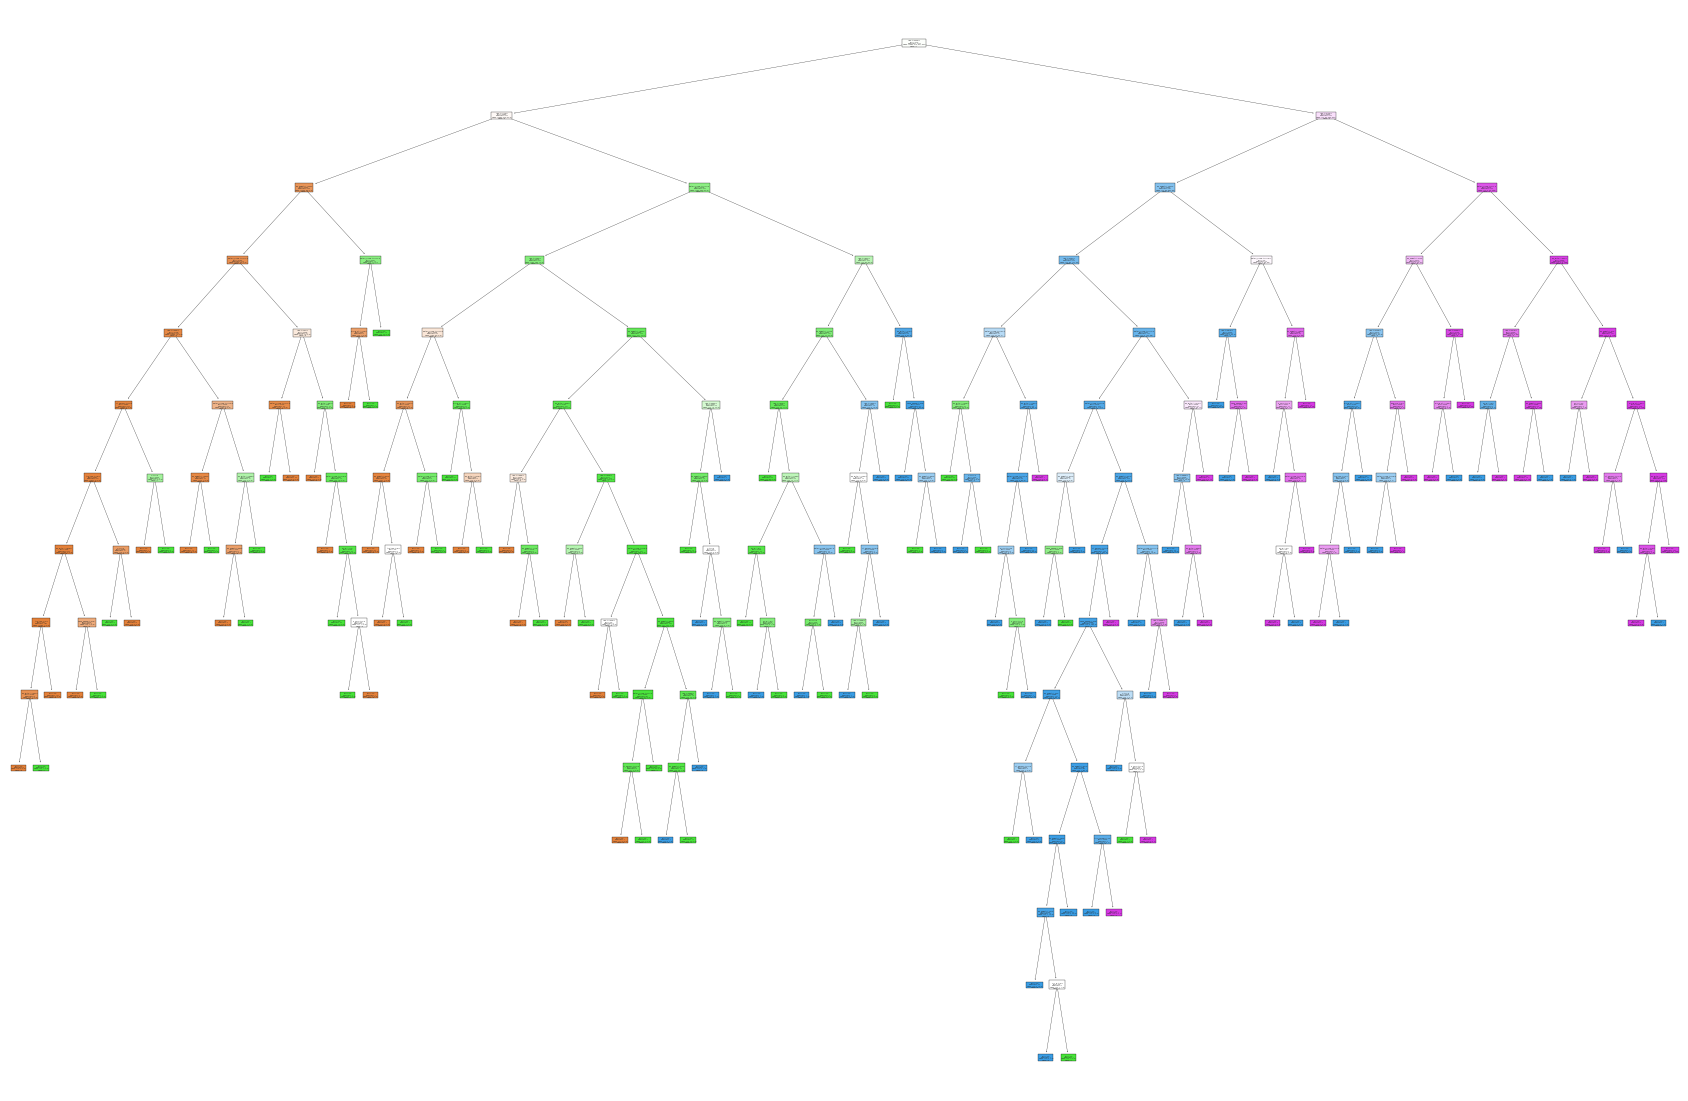

In [58]:
from sklearn import tree
%matplotlib inline

target_names = ['0', '1','2','3']
fig = plt.figure(figsize=(30,20))
plot= tree.plot_tree (arvre,feature_names=features,class_names=target_names,filled=True) 
plt.show()

#### Aplicando o modelo para classificar a base de testes e verificando sua acurácia

In [59]:
predicted_arvre = arvre.predict(x_test)
predicted_arvre2 = arvre.predict(x_train)
acuracia_arvre = metrics.accuracy_score(y_test, predicted_arvre)
acuracia_arvre2 = metrics.accuracy_score(y_train, predicted_arvre2)

print(f'Acurácia do modelo de árvore de decisão na base de testes: {acuracia_arvre*100:.4f}%')
print(f'Acurácia do modelo de árvore de decisão na base de treinamento: {acuracia_arvre2*100:.4f}%')

Acurácia do modelo de árvore de decisão na base de testes: 84.7500%
Acurácia do modelo de árvore de decisão na base de treinamento: 100.0000%


### Método de Regressão Múltipla

A regressão logística multinomial é utilizada quando a variável que se quer prever é nominal e se divide em mais de duas categorias. Esse método de classificação utiliza uma combinação linear das características observadas nas variáveis independentes para prever as probabilidades de um elemento pertencer cada categoria da variável dependente.

No caso da regressão multinomial, o coeficiente de regressão associado a uma variável dependente indica o quanto aquela variável aumenta (se for positivo) ou diminui (se for negativo) a probabilidade de um elemento pertencer a uma determinada categoria.

- Equacionando:
P(i, k) = βk ∙ Xi

Onde Xi é a matriz de variáveis explicativas que descrevem a observação i, βk é um vetor de coeficientes correspondentes ao resultado da categoria k e P(i, k) é a probabilidade de um elemento i ser observado na categoria k. A classificação do elemento será a categoria cuja probabilidade de ele ser observado é maior.

#### Criando o modelo de regressão:

In [60]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train, y_train)

prev = mul_lr.predict(x_test)


c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


#### Aplicando o modelo e a taxa de acerto das previsões

In [61]:

print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, prev))

Multinomial Logistic regression Test Accuracy ::  0.97125


[Voltar para o sumário](#sumario)

___
<div id='validation'></div>

## 4. Processo e Estatísticas de validação

Com as predições feitas, o próximo passo é validar os modelos. 
Para tal, utilizaremos as seguintes técnicas principais:
- Matrix de confusão;
- Validação cruzada.

### Matriz de confusão

Ela é uma tabela que compara os falsos e verdadeiros positivos com os falsos e verdadeiros negativos, ou seja, se o modelo fez a classificação corretamente ou errou, em números absolutos. Nesse caso, a matriz observa se o modelo classifou o preço dos celulares no range correto, ou o colocou em algum outro. 
Para tanto, foi utilizada a função ConfusionMatrix da biblioteca yellowbrick, a qual faz a distribuição por range, sendo a da diagonal principal correspondente à previsão correta. Observa-se que, quanto mais recorrente determinada classificação dentro de um range, mais escuira ela fica. 

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


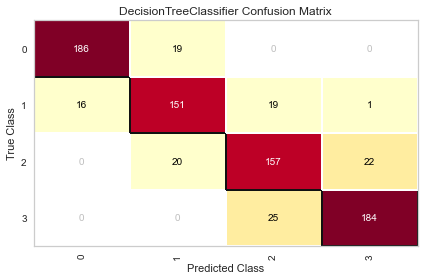

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
cm_arvore = ConfusionMatrix(
    arvre, classes=[0,1,2,3])


cm_arvore.fit(x_train, y_train)
cm_arvore.score(x_test, y_test)

cm_arvore.poof()

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


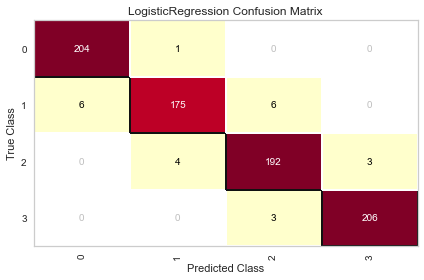

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
cm_logic = ConfusionMatrix(
    mul_lr, classes=[0,1,2,3])


cm_logic.fit(x_train, y_train)
cm_logic.score(x_test, y_test)

cm_logic.poof()

Para complementar a Matriz de confusão, também utilizou-se a função Classification Report, que devolve dois valores numéricos de interesse: a precisão (precision) e a média harmônica (em f1-score, como uma medida de confiabilidade da acurácia) por range , ou seja, por valor de celular.

In [64]:
print('Classification Report da Árvore: \n\n{}'.format(classification_report(y_test , predicted_arvre)))

Classification Report da Árvore: 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       205
           1       0.79      0.81      0.80       187
           2       0.78      0.79      0.78       199
           3       0.89      0.88      0.88       209

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



In [65]:
print('Classification Report da Árvore: \n\n{}'.format(classification_report(y_test , prev)))

Classification Report da Árvore: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       205
           1       0.97      0.94      0.95       187
           2       0.96      0.96      0.96       199
           3       0.99      0.99      0.99       209

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



### Validação cruzada

Consiste em repetir a aplicação das predições n vezes sobre distribuições diferentes dos dados em treinamento e teste. Desse modo, valida-se a qualidade do código para diferentes treinamentos, permitindo observar como sua acurácia vai se comportar diante de tal. 

In [66]:
acu_arv = []
acu_reg = []

for i in range(10):
    features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
    x = dados.loc[:, features]
    y = dados.loc[:, ['price_range']]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .60)

    # Regressão logística
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train, y_train)
    prev = mul_lr.predict(x_test)
    ac1 = metrics.accuracy_score(y_test, prev)
    acu_reg.append(ac1)
    
    # Árvore de Decisões
    arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    arvre.fit(x_train, y_train)
    p = arvre.predict(x_test)
    ac2 = metrics.accuracy_score(y_test, p)
    acu_arv.append(ac2)

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the num

Assim, ao utilizar o Describe() nas listas obtidas, pode-se obter a precisão média e seu desvio padrão de ambas as medidas após a validação cruzada, como observa-se, respectivamente, nas linhas "mean" e "std":

In [67]:
Ac_reg = pd.DataFrame({'Acurácia Regressão':acu_reg})
Ac_arv = pd.DataFrame({'Acurácia Árvore':acu_arv})
Ac_reg.describe()

,Acurácia Regressão
count,10.000000
mean,0.960625
std,0.006489
min,0.948750
25%,0.957188
50%,0.960000
75%,0.965000
max,0.970000


In [68]:
Ac_arv.describe()

,Acurácia Árvore
count,10.000000
mean,0.828250
std,0.016459
min,0.800000
25%,0.816875
50%,0.826875
75%,0.843125
max,0.850000


Por fim, foi contruído um histograma com a distribuição das medidas de precisão, a fim de acompanhar como se comportam. Assim como se esperava pelo baixo desvio padrão de ambos, obtidos no item anterior, nota-se que tem bastante medidas diferentes, mas com pouca variância entre si. 

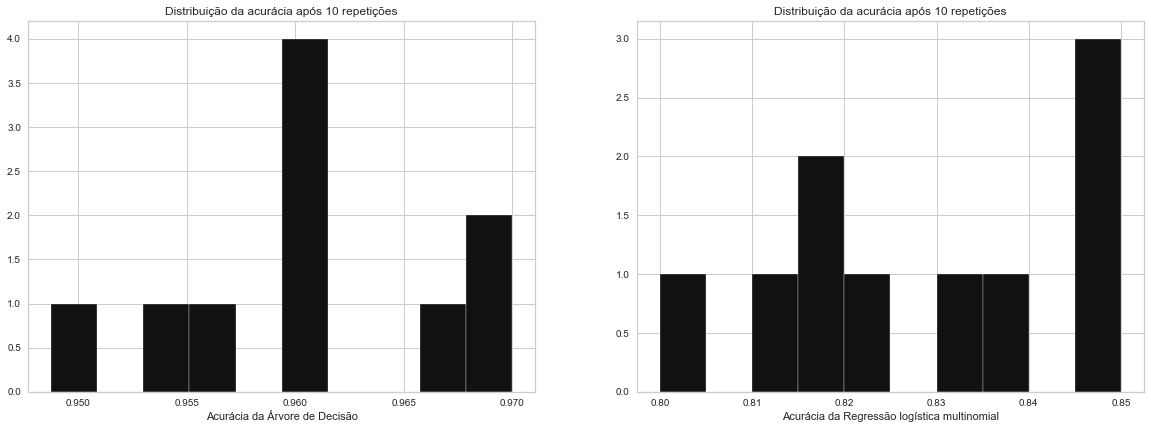

In [69]:
plt.figure(figsize=(20,15)) 

plt.subplot(221)
plt.hist(Ac_reg, edgecolor='white', color='k')
plt.xlabel('Acurácia da Árvore de Decisão')
plt.title("Distribuição da acurácia após 10 repetições")

plt.subplot(222)
plt.hist(Ac_arv, edgecolor='white', color='k')
plt.xlabel('Acurácia da Regressão logística multinomial')
plt.title("Distribuição da acurácia após 10 repetições")
plt.show()

[Voltar para o sumário](#sumario)

___
<div id='conclusion'></div>

## 5. Conclusão

Comparando os resultados obtidos, pode-se concluir que o modelo da regressão logística multinomial utilizado tem um melhor desempenho para prever o intervalo de preço de um celular dados seus atributos. Isso é observado não apenas para o conjunto de dados como um todo, para o qual o desempenho dos modelos foi analisado utilizando a acurácia, como também para cada uma das targets - já que comparando as matrizes de confusão referentes a cada um dos modelos pode-se ver que o número de acertos para cada uma das targets é maior no modelo da regressão logística multinomial do que no modelo da árvore de decisão.

Outro ponto importante a ser considerado para a análise de desempenho, uma vez que a variável dependente é qualitativa ordinal, é não só a quantidade de erros mas o quão grandes são os erros cometidos pelos modelos. Analisando a matrizes de confusão, conclui-se que a previsão realizada pela árvore de decisão tem erros maiores. Enquanto a regressão multinomial prevê valores incorretos mas com apenas 1 intervalo de diferença, a árvore de decisão chega a prever valores incorretos com até 2 intervalos de diferença do resultado esperado.

A acurácia da árvore de decisão para a base de dados de treinamento é muito alta, e diminui cerca de 15% quando aplicada na base de testes. Assim, pode-se concluir que está ocorrendo um "overfitting", nesse caso, a árvore de decisão utilizada aprendeu detalhes muito específicos da base de treinamento, influenciando negativamente a qualidade dos resultados obtidos para a base de dados de teste. Para melhorar a qualidade desse modelo pode-se restringir o número de nós da árvore, fazendo com que ela leve em conta menos informações desnecessárias.

Ademais, a média da acurácia da validação cruzada é bem semelhante a a acurácia inicialmente calculada em cada modelo. Além disso não há grandes variações entre o máximo e a média e o mínimo e a média.

[Voltar para o sumário](#sumario)

___
<div id='ref'></div>

## 6. Referências Bibliográficas

- Banco de dados:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price
- Método de Regressão Múltipla:
https://dataaspirant.com/implement-multinomial-logistic-regression-python/
https://en.wikipedia.org/wiki/Multinomial_logistic_regression#:~:text=Multinomial%20logistic%20regression%20is%20used,are%20more%20than%20two%20categories.
- Árvore
https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5
- matriz e confusão:
https://medium.com/data-hackers/entendendo-o-que-é-matriz-de-confusão-com-python-114e683ec509

[Voltar para o sumário](#sumario)